<img src="https://media.licdn.com/dms/image/v2/C4E12AQF4ZWPMoPxsBw/article-inline_image-shrink_400_744/article-inline_image-shrink_400_744/0/1520492650449?e=1748476800&v=beta&t=WBz25TNj4Urddtaz9EkTh9f1_PjaRiC8a-vUeooVgDw" style="float: right; margin-top: 50px; width: 300px; height: 200px;" alt="Descripción de la imagen">

# Anova de una via y Mulfactorial


#### - Comprobacion de Supuestos
###### · Independencia de las observaciones  (depende del diseno, ver requisitos para disenos experimentales para la seleccion de los grupos)
###### · Normalidad
###### · Homcedasticidad

#### - Opciones de Transformación de Datos

<img src="https://api.andreaprovino.it/wp-content/uploads/2020/04/crisp-dm-data-science-machine-learning-ibm-guida-italiano-data-mining.jpeg" width="200" height="200" align=Left>

## Business Understanding
######  Declaracion de variables y objetivos de la investigacion

<img src="https://api.andreaprovino.it/wp-content/uploads/2020/04/crisp-dm-data-science-machine-learning-ibm-guida-italiano-data-mining.jpeg" width="200" height="200" align=Left>

# Data Understanding
######  Recopilacion y exploracion de los datos EDA

In [1]:
# Import pandas and seaborn packages
import pandas as pd
import seaborn as sns


# Import statsmodels and ols function
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Post-hoc
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# t-test
from scipy import stats
import statsmodels.stats.weightstats as stests

# Import math package
import math           # Transformacion logaritmica

import matplotlib.pyplot as plt

In [2]:
# Load in diamonds data set from seaborn package
diamonds = sns.load_dataset("diamonds", cache=False)

# Examine first 5 rows of data set
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Anova de una via 

<img src="https://api.andreaprovino.it/wp-content/uploads/2020/04/crisp-dm-data-science-machine-learning-ibm-guida-italiano-data-mining.jpeg" width="200" height="200" align=Left>

## Data Preparation
######  Limpiar y transformar los datos para que sean adecuados para el modelado

In [3]:
diamonds["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [4]:
# Select only color and price columns, and reset index                     # Nuevo dataframe solo variables estudio
colorless = diamonds[["color","price"]].reset_index(drop=True)

# Remove dropped categories of diamond color                               (Se eliminan categorias que no quieren evaluarse o tienen valores extremos)
colorless['color'] = colorless['color'].cat.remove_categories(["G","J"])

In [5]:
# New Dataframe
colorless.head()

,color,price
0,E,326
1,E,326
2,E,327
3,I,334
4,NaN,335


In [6]:
colorless["color"].value_counts()

color
E    9797
F    9542
H    8304
D    6775
I    5422
Name: count, dtype: int64

Se desea conocer si existe diferencia significativa entre el color de los diamantes y su precio. Especificamente los diamantes incoloros, por lo tanto es necesario eliminar algunos grupos de diamantes.

In [7]:
colorless["color"].isna().sum()

14100

In [8]:
# Drop rows with missing values
colorless.dropna(inplace=True)

# Reset index
colorless.reset_index(inplace=True, drop=True)

colorless["color"].isna().sum()

0

Deteccion de valores atipicos y transformacion de datos

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='color', ylabel='price'>

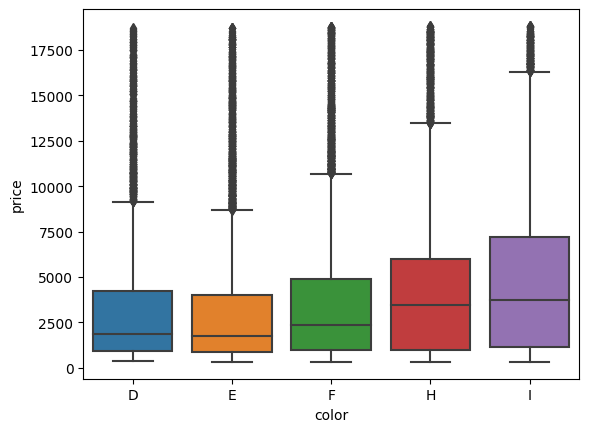

In [9]:
# Create boxplot to show distribution of price by color grade
sns.boxplot(x = "color", y = "price", data = colorless)

In [10]:
# Take the logarithm of the price, and insert it as the third column
colorless.insert(2, "log_price", [math.log(price) for price in colorless["price"]])

In [11]:
colorless.head(4)

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141


sns.boxplot(x = "color", y = "log_price", data = colorless)

<img src="https://api.andreaprovino.it/wp-content/uploads/2020/04/crisp-dm-data-science-machine-learning-ibm-guida-italiano-data-mining.jpeg" width="200" height="200" align=Left>

## Data Analysis / Modeling
######  Seleccionar y aplicar técnicas de modelado.

In [12]:
# Construct simple linear regression model, and fit the model
model = ols(formula = "log_price ~ C(color)", data = colorless).fit()

In [13]:
# Get summary statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Sun, 15 Feb 2026   Prob (F-statistic):          3.61e-225
Time:                        14:26:48   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Secuencial: Este tipo de suma de cuadrados se calcula en el orden en que se introducen las variables en el modelo.
# Ajustada: se calcula ajustando cada variable por las demás variables del modelo, excepto por las interacciones que la involucran.
# Marginal: Este tipo de suma de cuadrados se calcula ajustando cada variable por todas las demás variables del modelo, incluidas las interacciones.

In [15]:
# Run one-way ANOVA
sm.stats.anova_lm(model, typ = 2)     # pueden utilizarse los typ 1, 2 0 3   LA 2 ES LA MAS COMUN

# Secuencial: Este tipo de suma de cuadrados se calcula en el orden en que se introducen las variables en el modelo.
# Ajustada: se calcula ajustando cada variable por las demás variables del modelo, excepto por las interacciones que la involucran.
# Marginal: Este tipo de suma de cuadrados se calcula ajustando cada variable por todas las demás variables del modelo, incluidas las interacciones.

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


***Hipotesis para el estudio:***

Ho:  No existen diferencias estadísticamente significativas en el precio promedio de los diamantes basadas en su grado de color
Ho:  price_D = price_E = price_F = price_H = price_I

H1: Existen diferencias estadísticamente significativas en el precio promedio de los diamantes basadas en su grado de color
Ho:  price_D ≠ price_E ≠ price_F ≠ price_H ≠ price_I

***Esto implica que al menos una pareja de grupos tiene medias significativamente diferentes.***

***Dado que el valor p es extremadamente pequeño (3.609774e-225 < 0.05), rechazamos la hipótesis nula.
Hay evidencia estadísticamente significativa de que existen diferencias en el precio de los diamantes entre los diferentes grupos de color.***

***Analisis post-hoc***

In [16]:
# Run Tukey's HSD post hoc test for one-way ANOVA
tukey_oneway = pairwise_tukeyhsd(endog = colorless["log_price"], groups = colorless["color"], alpha = 0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.1169,-0.0802,0.0052,False
D,F,0.1455,0.0,0.1026,0.1885,True
D,H,0.3015,0.0,0.2573,0.3458,True
D,I,0.4061,0.0,0.3568,0.4553,True
E,F,0.183,0.0,0.1441,0.2219,True
E,H,0.339,0.0,0.2987,0.3794,True
E,I,0.4436,0.0,0.3978,0.4893,True
F,H,0.156,0.0,0.1154,0.1966,True
F,I,0.2605,0.0,0.2145,0.3065,True
H,I,0.1045,0.0,0.0573,0.1517,True


Despues de un analisis post-hoc para un anova de una via, podemos calcular especificamente la relacion entre dos grupos que previamente hemos identificado con una diferencia significativa y determinar para que grupo (de dos) los resultados de la variable dependiente son mayores o inferiores.

Para esto aplicar un T-student de una cola

In [17]:
a = colorless['color'] == 'E'
b = colorless['color'] == 'F'
t_stat, p_value = stats.ttest_ind(a=a, b=b, alternative='greater')
print(round(p_value,2), 'Si p-value < 0.50 se rechaza la hipotesis nula')

nan Si p-value < 0.50 se rechaza la hipotesis nula


<img src="https://api.andreaprovino.it/wp-content/uploads/2020/04/crisp-dm-data-science-machine-learning-ibm-guida-italiano-data-mining.jpeg" width="200" height="200" align=Left>

### Validation / evaluation
######  Evaluar el rendimiento del modelo en relación con los objetivos de negocio.

In [18]:
# Obtener los residuos
residuals = model.resid

#### Supuestos

Kolmogorov-Smirnov test: 0.0 normalidad para p_value > 0.5
Levene 0.0 homocedastividad para p_value > 0.5


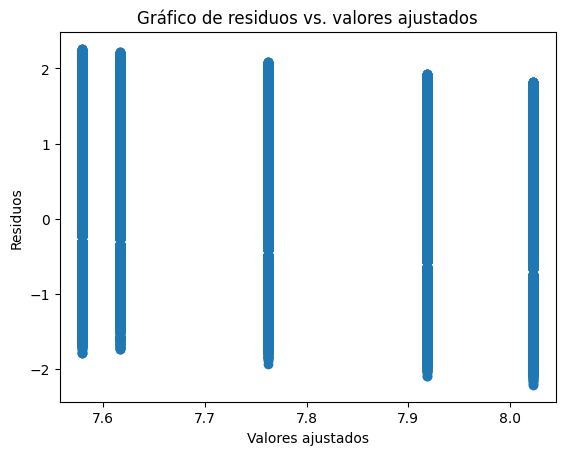

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


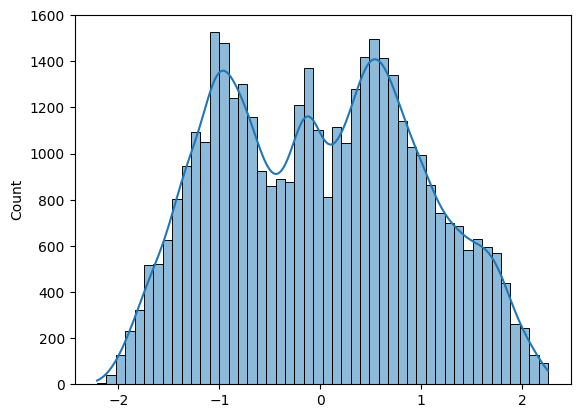

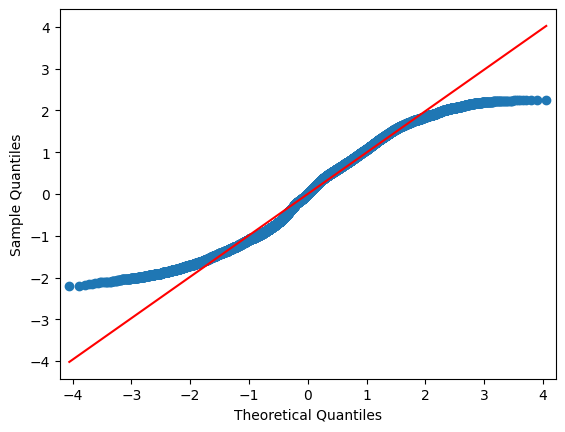

In [19]:
# Prueba de Shapiro-Wilk para normalidad
from scipy import stats
ks_test, p = stats.kstest(residuals, 'norm')
print('Kolmogorov-Smirnov test:', round(p,2), 'normalidad para p_value > 0.5')

#la prueba de Levene
colores_unicos = colorless['color'].unique()                                            # 2. Obtener los valores únicos de la columna 'color'    
grupos_residuos = [residuals[colorless['color'] == color] for color in colores_unicos]  # 3. Separar los residuos en grupos basados en los valores únicos de 'color'
levene_test, Levene_p_value = stats.levene(*grupos_residuos)                            # 4. Realizar la prueba de Levene
print('Levene', round(Levene_p_value,2), 'homocedastividad para p_value > 0.5')         # 5. Imprimir los resultados


# Graficar los residuos vs. valores ajustados
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos vs. valores ajustados")
plt.show()

sns.histplot(residuals,kde=True)  

# Gráfico Q-Q de los residuos
import statsmodels.api as sm
import pylab
sm.qqplot(residuals, line='s')
plt.show()


# Anova de dos vias

<img src="https://api.andreaprovino.it/wp-content/uploads/2020/04/crisp-dm-data-science-machine-learning-ibm-guida-italiano-data-mining.jpeg" width="200" height="200" align=Left>

## Data Preparation
######  Limpiar y transformar los datos para que sean adecuados para el modelado

In [20]:
# Subset for color, cut, price columns
diamonds2 = diamonds[["color","cut","price"]]

# Only include colorless diamonds
diamonds2 = diamonds2[diamonds2["color"].isin(["E","F","H","D","I"])]

# Drop removed colors, G and J
diamonds2.color = diamonds2.color.cat.remove_categories(["G","J"])

# Only include ideal, premium, and very good diamonds
diamonds2 = diamonds2[diamonds2["cut"].isin(["Ideal","Premium","Very Good"])]

# Drop removed cuts
diamonds2.cut = diamonds2.cut.cat.remove_categories(["Good","Fair"])

# Drop NaNs
diamonds2.dropna(inplace = True)

# Reset index
diamonds2.reset_index(inplace = True, drop = True)

# Add column for logarithm of price
diamonds2.insert(3,"log_price",[math.log(price) for price in diamonds2["price"]])

In [21]:
diamonds2

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083
...,...,...,...,...
34930,D,Premium,2757,7.921898
34931,D,Ideal,2757,7.921898
34932,D,Very Good,2757,7.921898
34933,H,Premium,2757,7.921898


<img src="https://api.andreaprovino.it/wp-content/uploads/2020/04/crisp-dm-data-science-machine-learning-ibm-guida-italiano-data-mining.jpeg" width="200" height="200" align=Left>

## Data Analysis / Modeling
######  Seleccionar y aplicar técnicas de modelado.

In [22]:
model2 = ols(formula = "log_price ~ C(color) + C(cut) + C(color):C(cut)", data = diamonds2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     119.5
Date:                Sun, 15 Feb 2026   Prob (F-statistic):               0.00
Time:                        14:26:50   Log-Likelihood:                -49159.
No. Observations:               34935   AIC:                         9.835e+04
Df Residuals:                   34920   BIC:                         9.847e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.4567      0.019    401.583      0.000       7.420       7.493
C(color)[T.E]                        -0.0056      0.024     -0.231      0.817      -0.053       0.042
C(color)[T.F]                         0.1755      0.024      7.166      0.000       0.128       0.224
C(color)[T.H]                         0.2756      0.026     10.739      0.000       0.225       0.326
C(color)[T.I]                         0.3787      0.028     13.294      0.000       0.323       0.435
C(cut)[T.Premium]                     0.2828      0.031      9.153      0.000       0.222       0.343
C(cut)[T.Very Good]                   0.2295      0.031      7.290      0.000       0.168       0.291
C(color)[T.E]:C(cut)[T.Premium]      -0.0322      0.040     -0.800      0.424      -0.111       0.047
C(color)[T.F]:C(cut)[T.Premium]       0.0313      0.040      0.775      0.438      -0.048       0.110
C(color)[T.H]:C(cut)[T.Premium]       0.0947      0.041      2.308      0.021       0.014       0.175
C(color)[T.I]:C(cut)[T.Premium]       0.0841      0.046      1.832      0.067      -0.006       0.174
C(color)[T.E]:C(cut)[T.Very Good]    -0.0931      0.041     -2.294      0.022      -0.173      -0.014
C(color)[T.F]:C(cut)[T.Very Good]    -0.1013      0.041     -2.459      0.014      -0.182      -0.021
C(color)[T.H]:C(cut)[T.Very Good]    -0.0247      0.043     -0.576      0.564      -0.109       0.059
C(color)[T.I]:C(cut)[T.Very Good]     0.0359      0.048      0.753      0.451      -0.057       0.129
==============================================================================
Omnibus:                     4862.888   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.556
Skew:                           0.108   Prob(JB):                    2.06e-271
Kurtosis:                       2.100   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Run two-way ANOVA
sm.stats.anova_lm(model2, typ = 2)     # Puede ser tipo 1,2,3

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,sum_sq,df,F,PR(>F)
C(color),926.361461,4.0,237.014783,3.481145e-201
C(cut),630.641441,2.0,322.706309,1.348511e-139
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


In [24]:
diamonds2

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083
...,...,...,...,...
34930,D,Premium,2757,7.921898
34931,D,Ideal,2757,7.921898
34932,D,Very Good,2757,7.921898
34933,H,Premium,2757,7.921898


In [25]:
# Crear una columna que represente las combinaciones de color y cut
diamonds2['color_cut'] = diamonds2['color'].astype(str) + '_' + diamonds2['cut'].astype(str)

# Realizar la prueba de Tukey para las combinaciones
tukey_multifactorial = pairwise_tukeyhsd(endog=diamonds2['log_price'], groups=diamonds2['color_cut'], alpha=0.05)

print(tukey_multifactorial.summary())

/usr/local/lib/python3.11/dist-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    D_Ideal   D_Premium   0.2828    0.0   0.178  0.3875   True
    D_Ideal D_Very Good   0.2295    0.0  0.1227  0.3362   True
    D_Ideal     E_Ideal  -0.0056    1.0 -0.0884  0.0771  False
    D_Ideal   E_Premium   0.2449    0.0  0.1512  0.3386   True
    D_Ideal E_Very Good   0.1307 0.0002  0.0377  0.2237   True
    D_Ideal     F_Ideal   0.1755    0.0  0.0925  0.2586   True
    D_Ideal   F_Premium   0.4896    0.0  0.3959  0.5833   True
    D_Ideal F_Very Good   0.3037    0.0   0.208  0.3994   True
    D_Ideal     H_Ideal   0.2756    0.0  0.1885  0.3626   True
    D_Ideal   H_Premium    0.653    0.0  0.5596  0.7464   True
    D_Ideal H_Very Good   0.4803    0.0  0.3797  0.5809   True
    D_Ideal     I_Ideal   0.3787    0.0  0.2821  0.4754   True
    D_Ideal   I_Premium   0.7455    0.0  0.6367  0.8543